In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib

from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


In [2]:
raw_data = pd.read_csv('hitrate.csv')
raw_data

,Benchmark,Baseline(L1),Prefetcher(L1),Probing(L1),Valkyrie(L1),RatioBaseline(L1),RatioPrefetcher(L1),RatioProbing(L1),RatioValkyrie(L1)
0,mt,0.092804,61.570,17.50,63.50,0.000928,0.615700,0.175000,0.635000
1,mm,38.680000,67.810,80.10,81.84,0.386800,0.678100,0.801000,0.818400
2,km,67.240000,79.100,83.64,87.00,0.672400,0.791000,0.836400,0.870000
3,st,33.840000,40.380,51.00,52.00,0.338400,0.403800,0.510000,0.520000
4,pr,55.960000,71.510,80.58,82.52,0.559600,0.715100,0.805800,0.825200
5,spmv,10.840000,80.010,53.13,85.03,0.108400,0.800100,0.531300,0.850300
6,flw,74.650000,79.074,88.00,92.00,0.746500,0.790740,0.880000,0.920000
7,fir,99.300000,99.300,99.30,99.30,0.993000,0.993000,0.993000,0.993000
8,sc,99.900000,99.900,99.90,99.90,0.999000,0.999000,0.999000,0.999000
9,bs,100.000000,100.000,100.00,100.00,1.000000,1.000000,1.000000,1.000000


In [3]:
stacked_data = raw_data
# stacked_data['LBP'] = stacked_data['LBP(L1)']
# stacked_data['ITCM'] = stacked_data['ITCM(L1)']
# stacked_data['Valkyrie'] = stacked_data['Valkyrie(L1)']
# stacked_data['Baseline'] = stacked_data['Baseline(L1)']


stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Baseline(L1)', 'Prefetcher(L1)','Probing(L1)','Valkyrie(L1)'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()

#stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'L1TLBHitRate']
stacked_data['L1TLBHitRate'] /= 100

#stacked_data


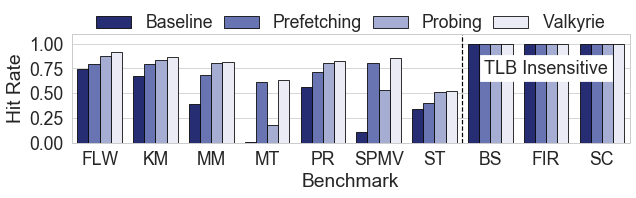

In [9]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='L1TLBHitRate', 
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            palette=['#1A237E','#5C6BC0','#9FA8DA', '#E8EAF6' ], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels=['Baseline', 'Prefetching', 'Probing', 'Valkyrie']
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=4)
ax.set_ylabel('Hit Rate')
ax.set_ylim(0, 1.1)
ax.set_yticks([0, 0.25, 0.50, 0.75, 1.00])

ax.axvline(6.5, 0, 1, c='k', ls='--')
ax.text(8, 0.75, 'TLB Insensitive',  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(fc='white'))


plt.savefig('hitrate.pdf', bbox_inches='tight')
plt.savefig('hitrate.png', dpi=600, bbox_inches='tight')

plt.show()
plt.close()

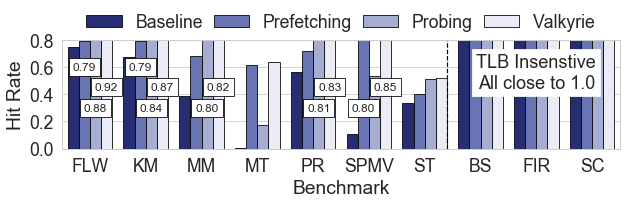

In [5]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='L1TLBHitRate', 
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            palette=['#1A237E','#5C6BC0','#9FA8DA', '#E8EAF6' ], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels=['Baseline', 'Prefetching', 'Probing', 'Valkyrie']
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.16), loc=10, ncol=4)
ax.set_ylabel('Hit Rate')
ax.set_ylim(0, 0.8)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])

ax.axvline(6.4, 0, 1, c='k', ls='--')
ax.text(8, 0.56, 'TLB Insenstive\nAll close to 1.0',  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(fc='white'))

ax.text(-0.1, 0.6, 0.79, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))
ax.text(0.1, 0.3, 0.88, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))
ax.text(0.3, 0.45, 0.92, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))

ax.text(0.9, 0.6, 0.79, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))
ax.text(1.1, 0.3, 0.84, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))
ax.text(1.3, 0.45, 0.87, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))

ax.text(2.1, 0.3, "0.80", 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))
ax.text(2.3, 0.45, 0.82, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))

ax.text(4.1, 0.3, "0.81", 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))
ax.text(4.3, 0.45, 0.83, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))

ax.text(4.9, 0.3, "0.80", 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))
ax.text(5.3, 0.45, 0.85, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white', ec='k'))



plt.savefig('hitrate_08.pdf', bbox_inches='tight')
plt.savefig('hitrate_08.png', dpi=600, bbox_inches='tight')

plt.show()
plt.close()